                             R2           MSE           MAE
Linear Regression -1.444988e+22  1.140731e+30  5.601132e+14
Decision Tree      8.561810e-01  1.135365e+07  2.151675e+03
Random Forest      9.546635e-01  3.579042e+06  1.339117e+03
Gradient Boosting  9.332523e-01  5.269332e+06  1.636354e+03
SVR               -1.017173e-01  8.697400e+07  5.705061e+03


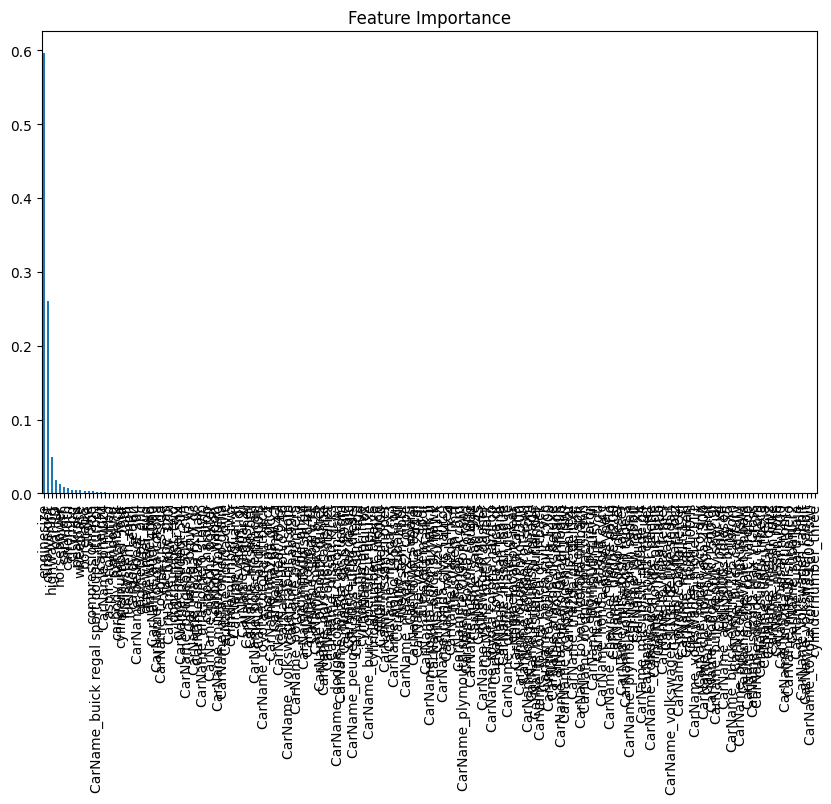

0.9523939887967557 3758209.9424261306 1359.3946362844472


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

url = "https://drive.google.com/uc?export=download&id=1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP"
df = pd.read_csv(url)

# Select only numeric columns for preprocessing
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

df = pd.get_dummies(df, drop_first=True)

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR()
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2_score = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[model_name] = {"R2": r2_score, "MSE": mse, "MAE": mae}

results_df = pd.DataFrame(results).T
print(results_df)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance')
plt.show()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

r2_score_best_rf = best_rf.score(X_test, y_test)
mse_best_rf = mean_squared_error(y_test, y_pred)
mae_best_rf = mean_absolute_error(y_test, y_pred)

print(r2_score_best_rf, mse_best_rf, mae_best_rf)
